In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

email_data = pd.read_csv('/content/drive/MyDrive/FYPDataset/email_topics.csv')

Mounted at /content/drive


In [ ]:
email_data.columns

Index(['From', 'To', 'Subject', 'Message', 'Day', 'Date & Time',
       'Response Time', 'Extracted Metadata', 'Cleaned_Message',
       'Cleaned_Subject', 'Combined_Text', 'Summarized_Text', 'Topic',
       'Topic_Label', 'Category', 'Priority'],
      dtype='object')

In [ ]:
email_data = email_data.drop(columns=["Topic_Label"])
email_data = email_data.drop(columns=["Category"])
email_data = email_data.drop(columns=["Priority"])
email_data = email_data.drop(columns=["Summarized_Text"])

In [ ]:
email_data = email_data.dropna(subset=["Cleaned_Subject"])

In [ ]:
email_data

#Combined_Text Exploration

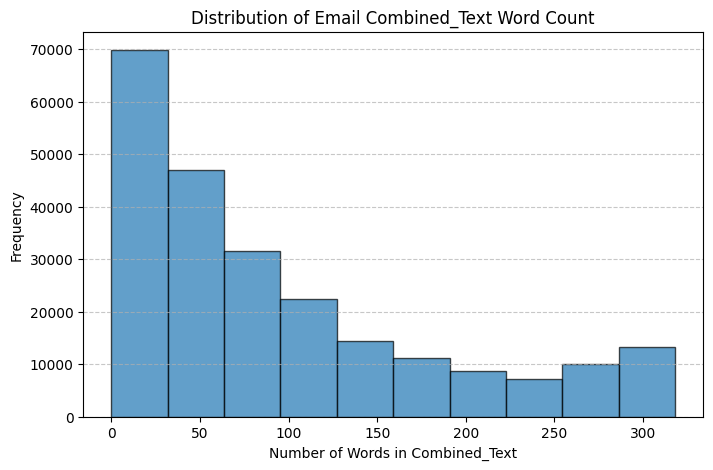

In [ ]:
import matplotlib.pyplot as plt
email_data["Word_Count"] = email_data["Combined_Text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 5))
plt.hist(email_data["Word_Count"], bins=10, alpha=0.7, edgecolor='black')
plt.xlabel("Number of Words in Combined_Text")
plt.ylabel("Frequency")
plt.title("Distribution of Email Combined_Text Word Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
nan_variants = ["nan", "NaN", "NAN", "Nan"]
nan_word_count = email_data["Combined_Text"].isin(nan_variants).sum()
print(f"Number of occurrences of 'nan' (any format) in 'Cleaned_Subject': {nan_word_count}")

Number of occurrences of 'nan' (any format) in 'Cleaned_Subject': 0


In [ ]:
domain_words_to_remove = ["hourahead", "codesite", "crawler"]
email_data["Combined_Text"] = email_data["Combined_Text"].apply(
    lambda x: " ".join([word for word in x.split() if word not in domain_words_to_remove])
)

In [ ]:
proper_nouns_to_remove = ["ken", "lay", "commissioner", "hi", "hey"]
email_data["Combined_Text"] = email_data["Combined_Text"].apply(
    lambda x: " ".join([word for word in x.split() if word not in proper_nouns_to_remove])
)

In [ ]:
from collections import Counter

email_data["Combined_Text"] = email_data["Combined_Text"].astype(str).fillna("")
all_words = " ".join(email_data["Combined_Text"]).lower()
word_counts = Counter(all_words.split())
word_freq_df = pd.DataFrame(word_counts.items(), columns=["Word", "Frequency"])
word_freq_df = word_freq_df.sort_values(by="Frequency", ascending=False)

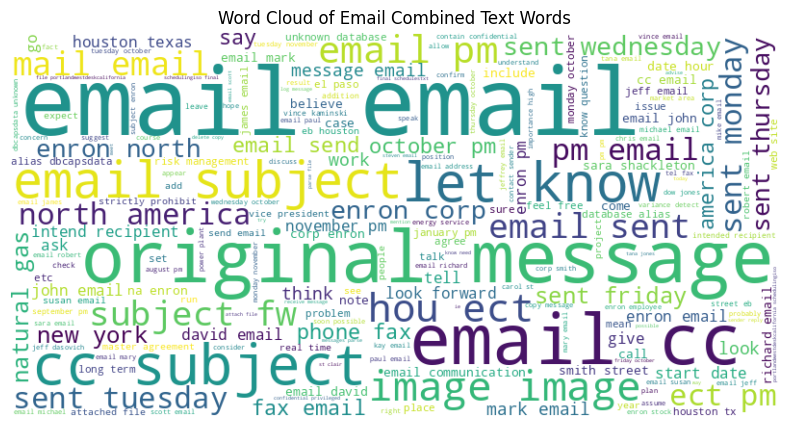

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Email Combined Text Words")
plt.show()

Top 10 High-Priority Keywords:
          Word  Frequency
67       email     806745
70     subject     193884
223      enron     177512
274         pm     159635
1233   message     134619
607         cc     118619
1384  original     100003
312       know      89945
236       mail      87387
86         new      82066


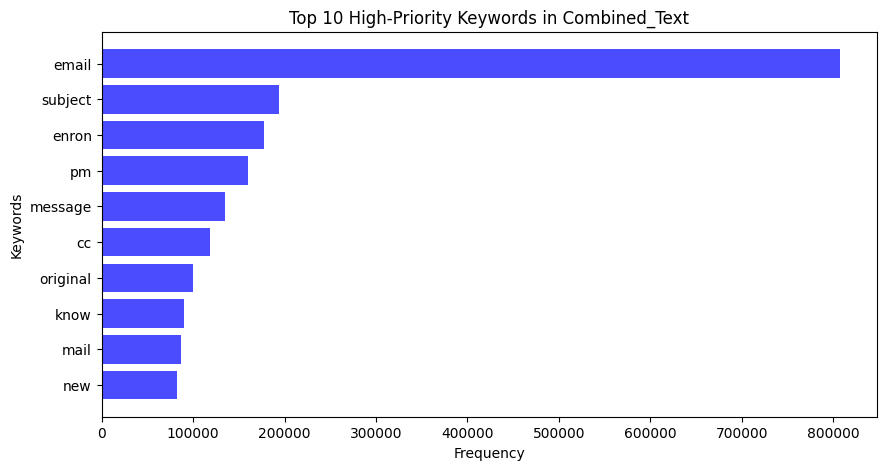

In [ ]:
print("Top 10 High-Priority Keywords:")
print(word_freq_df.head(10))

plt.figure(figsize=(10, 5))
plt.barh(word_freq_df.head(10)["Word"], word_freq_df.head(10)["Frequency"], color='blue', alpha=0.7)
plt.xlabel("Frequency")
plt.ylabel("Keywords")
plt.title("Top 10 High-Priority Keywords in Combined_Text")
plt.gca().invert_yaxis()
plt.show()

High-Priority Keyword Frequency:
                Keyword  Frequency
0                urgent       1261
1             immediate       2199
2                  asap       3798
3        time sensitive        156
4              deadline       2399
5          final notice         20
6   immediate attention        175
7          top priority          0
8         high priority        373
9             important       7413
10             critical       2844
11      action required         79
12      response needed         30
13       your attention          0
14                alert       2295
15             security       4949
16               breach        522
17          payment due          7
18              invoice       3145
19           compliance       1931


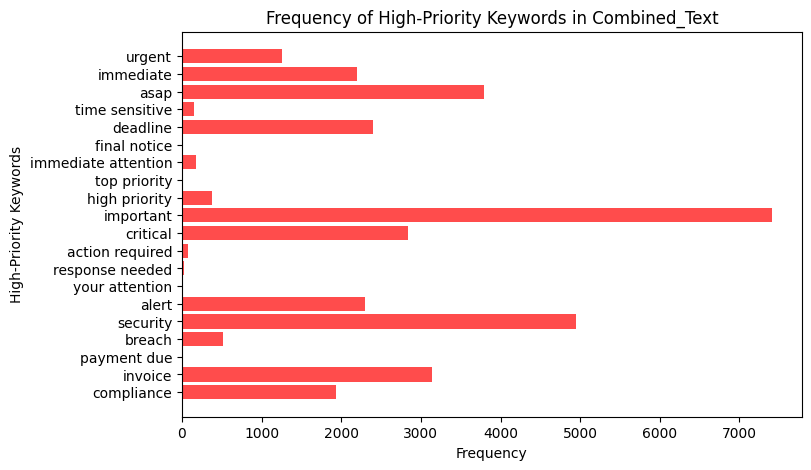

In [ ]:
high_priority_keywords = [
    # Urgency
    "urgent", "immediate", "asap", "time sensitive", "deadline", "final notice", "immediate attention", "top priority", "high priority",

    # Action Required
    "important", "critical", "action required", "response needed", "your attention",

    # Security Alerts
    "alert", "security", "breach",

    # Financial & Compliance
    "payment due", "invoice", "final notice", "compliance"
]


keyword_frequencies = {keyword: email_data["Combined_Text"]
                       .str.contains(rf"\b{keyword}\b", case=False, na=False).sum()
                       for keyword in high_priority_keywords}

priority_keyword_freq_df = pd.DataFrame(list(keyword_frequencies.items()),
                                        columns=["Keyword", "Frequency"])

print("High-Priority Keyword Frequency:")
print(priority_keyword_freq_df)

plt.figure(figsize=(8, 5))
plt.barh(priority_keyword_freq_df["Keyword"], priority_keyword_freq_df["Frequency"],
         color='red', alpha=0.7)
plt.xlabel("Frequency")
plt.ylabel("High-Priority Keywords")
plt.title("Frequency of High-Priority Keywords in Combined_Text")
plt.gca().invert_yaxis()
plt.show()

Medium-Priority Keyword Frequency:
         Keyword  Frequency
0       reminder       3327
1         update      18761
2      follow-up          0
3   notification       3141
4        meeting      24514
5         agenda       3538
6         report      21988
7         review      27609
8           task       2013
9     assignment       3218
10       pending        311
11      progress       3081
12           FYI      11555
13   information      37953
14   please read        383
15       summary       6019


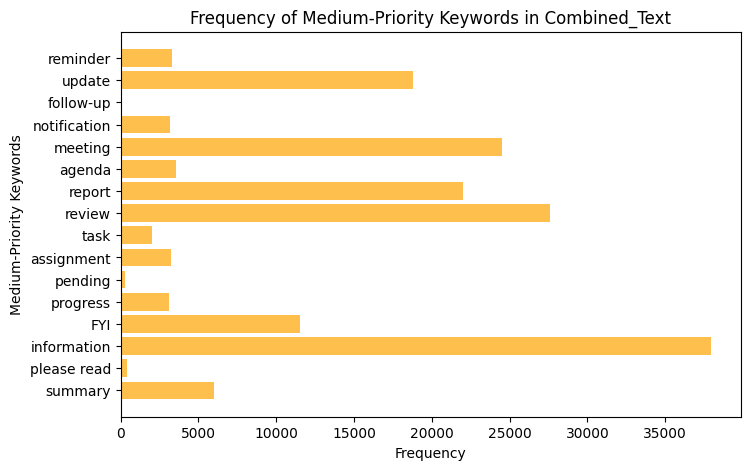

In [ ]:
medium_priority_keywords = [
    # Reminders & Updates
    "reminder", "update", "follow-up", "notification",

    # Meetings & Reports
    "meeting", "agenda", "report", "review",

    # Tasks & Assignments
    "task", "assignment", "pending", "progress",

    # General Work Communication
    "FYI", "information", "please read", "summary"
]

keyword_frequencies = {keyword: email_data["Combined_Text"]
                       .str.contains(rf"\b{keyword}\b", case=False, na=False).sum()
                       for keyword in medium_priority_keywords}

priority_keyword_freq_df = pd.DataFrame(list(keyword_frequencies.items()),
                                        columns=["Keyword", "Frequency"])

print("Medium-Priority Keyword Frequency:")
print(priority_keyword_freq_df)

plt.figure(figsize=(8, 5))
plt.barh(priority_keyword_freq_df["Keyword"], priority_keyword_freq_df["Frequency"],
         color='orange', alpha=0.7)
plt.xlabel("Frequency")
plt.ylabel("Medium-Priority Keywords")
plt.title("Frequency of Medium-Priority Keywords in Combined_Text")
plt.gca().invert_yaxis()
plt.show()

#Subject Exploration

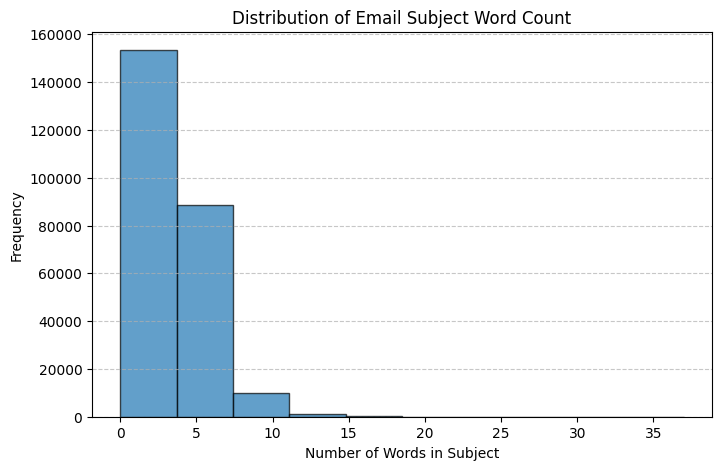

In [ ]:
import matplotlib.pyplot as plt
email_data["Word_Count"] = email_data["Cleaned_Subject"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 5))
plt.hist(email_data["Word_Count"], bins=10, alpha=0.7, edgecolor='black')
plt.xlabel("Number of Words in Subject")
plt.ylabel("Frequency")
plt.title("Distribution of Email Subject Word Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
nan_variants = ["nan", "NaN", "NAN", "Nan"]
nan_word_count = email_data["Cleaned_Subject"].isin(nan_variants).sum()
print(f"Number of occurrences of 'nan' (any format) in 'Cleaned_Subject': {nan_word_count}")

Number of occurrences of 'nan' (any format) in 'Cleaned_Subject': 0


In [ ]:
email_data = email_data[~email_data["Cleaned_Subject"].isin(nan_variants)]
email_data = email_data.dropna(subset=["Cleaned_Subject"])

In [ ]:
email_data["Is_Forwarded"] = email_data["Cleaned_Subject"].str.startswith(("fw", "fwd")).astype(int)
email_data["Is_Forwarded"].value_counts()

,count
Is_Forwarded,
0,208732
1,26990


In [ ]:
domain_words_to_remove = ["hourahead", "codesite", "crawler"]
email_data["Cleaned_Subject"] = email_data["Cleaned_Subject"].apply(
    lambda x: " ".join([word for word in x.split() if word not in domain_words_to_remove])
)

In [ ]:
proper_nouns_to_remove = ["ken", "lay", "commissioner", "hi", "hey"]
email_data["Cleaned_Subject"] = email_data["Cleaned_Subject"].apply(
    lambda x: " ".join([word for word in x.split() if word not in proper_nouns_to_remove])
)

In [ ]:
from collections import Counter

email_data["Cleaned_Subject"] = email_data["Cleaned_Subject"].astype(str).fillna("")
all_words = " ".join(email_data["Cleaned_Subject"]).lower()
word_counts = Counter(all_words.split())
word_freq_df = pd.DataFrame(word_counts.items(), columns=["Word", "Frequency"])
word_freq_df = word_freq_df.sort_values(by="Frequency", ascending=False)

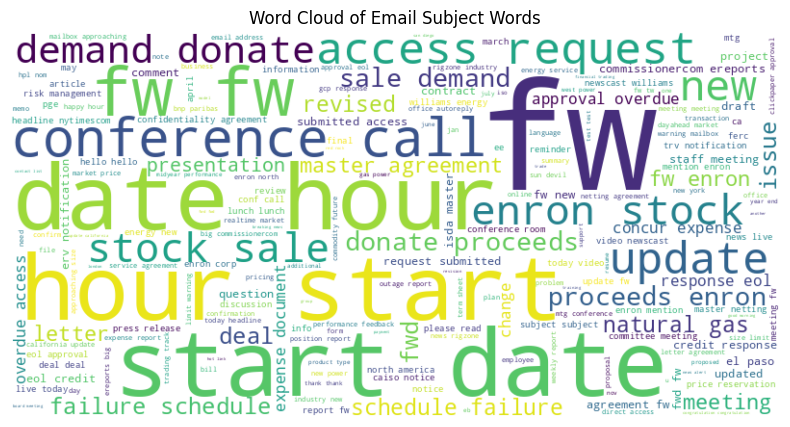

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Email Subject Words")
plt.show()

Top 10 High-Priority Keywords:
           Word  Frequency
1263         fw      26034
65      meeting       8388
152       enron       8341
69    agreement       6304
54          new       5739
239         gas       5719
39       report       5331
18       energy       4963
10        power       4816
223      update       4769


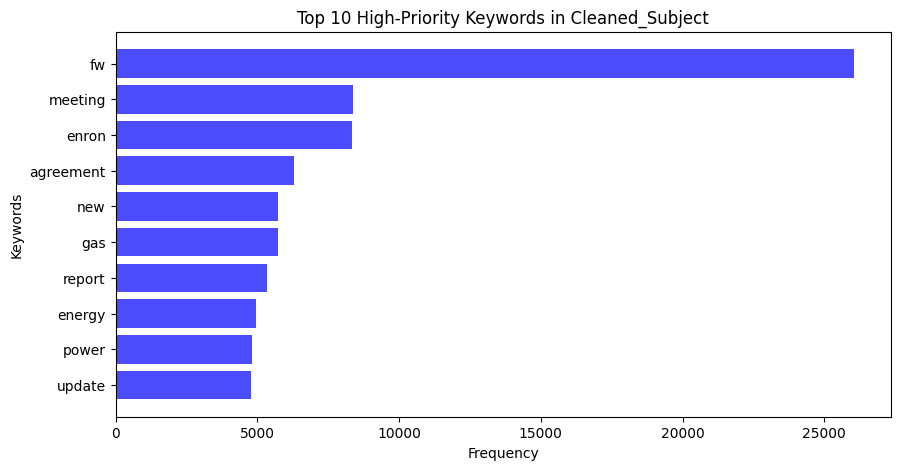

In [ ]:
print("Top 10 High-Priority Keywords:")
print(word_freq_df.head(10))

plt.figure(figsize=(10, 5))
plt.barh(word_freq_df.head(10)["Word"], word_freq_df.head(10)["Frequency"], color='blue', alpha=0.7)
plt.xlabel("Frequency")
plt.ylabel("Keywords")
plt.title("Top 10 High-Priority Keywords in Cleaned_Subject")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
high_priority_keywords = [
    # Urgency
    "urgent", "immediate", "asap", "time sensitive", "deadline", "final notice", "immediate attention", "top priority", "high priority",

    # Action Required
    "important", "critical", "action required", "response needed", "your attention",

    # Security Alerts
    "alert", "security", "breach",

    # Financial & Compliance
    "payment due", "invoice", "final notice", "compliance"
]


keyword_frequencies = {keyword: email_data["Cleaned_Subject"]
                       .str.contains(rf"\b{keyword}\b", case=False, na=False).sum()
                       for keyword in high_priority_keywords}

priority_keyword_freq_df = pd.DataFrame(list(keyword_frequencies.items()),
                                        columns=["Keyword", "Frequency"])

print("High-Priority Keyword Frequency:")
print(priority_keyword_freq_df)

plt.figure(figsize=(8, 5))
plt.barh(priority_keyword_freq_df["Keyword"], priority_keyword_freq_df["Frequency"],
         color='red', alpha=0.7)
plt.xlabel("Frequency")
plt.ylabel("High-Priority Keywords")
plt.title("Frequency of High-Priority Keywords in Cleaned_Subject")
plt.gca().invert_yaxis()
plt.show()

High-Priority Keyword Frequency:
                Keyword  Frequency
0                urgent        229
1             immediate        400
2                  asap        524
3        time sensitive         19
4              deadline        433
5          final notice          3
6   immediate attention         18
7          top priority          0
8         high priority         36
9             important       1237
10             critical        524
11      action required         23
12      response needed          9
13       your attention          0
14                alert        533
15             security        795
16               breach         62
17          payment due          2
18              invoice        585
19           compliance        423


NameError: name 'plt' is not defined

Medium-Priority Keyword Frequency:
         Keyword  Frequency
0       reminder       1041
1         update       4752
2      follow-up          0
3   notification       1497
4        meeting       8343
5         agenda        628
6         report       5305
7         review       1443
8           task        170
9     assignment        807
10       pending        106
11      progress        123
12           FYI        486
13   information       1733
14   please read        381
15       summary       1233


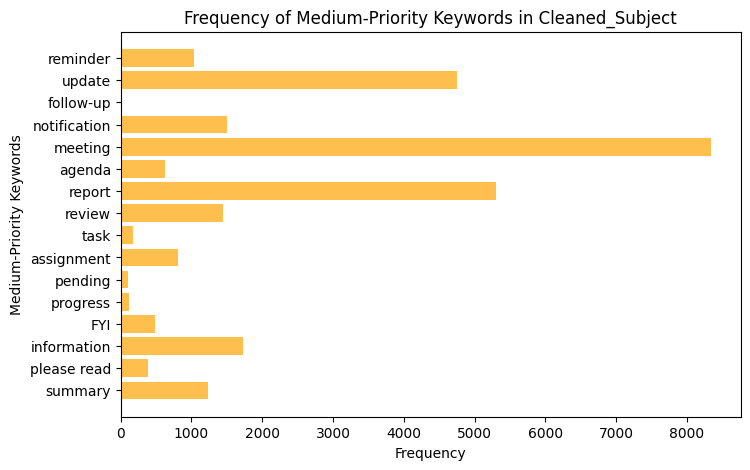

In [ ]:
medium_priority_keywords = [
    # Reminders & Updates
    "reminder", "update", "follow-up", "notification",

    # Meetings & Reports
    "meeting", "agenda", "report", "review",

    # Tasks & Assignments
    "task", "assignment", "pending", "progress",

    # General Work Communication
    "FYI", "information", "please read", "summary"
]

keyword_frequencies = {keyword: email_data["Cleaned_Subject"]
                       .str.contains(rf"\b{keyword}\b", case=False, na=False).sum()
                       for keyword in medium_priority_keywords}

priority_keyword_freq_df = pd.DataFrame(list(keyword_frequencies.items()),
                                        columns=["Keyword", "Frequency"])

print("Medium-Priority Keyword Frequency:")
print(priority_keyword_freq_df)

plt.figure(figsize=(8, 5))
plt.barh(priority_keyword_freq_df["Keyword"], priority_keyword_freq_df["Frequency"],
         color='orange', alpha=0.7)
plt.xlabel("Frequency")
plt.ylabel("Medium-Priority Keywords")
plt.title("Frequency of Medium-Priority Keywords in Cleaned_Subject")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import re

high_priority_keywords = ["urgent", "immediate", "asap", "time sensitive", "deadline", "final notice",
                              "important", "critical", "action required", "response needed", "alert", "security",
                              "breach", "payment due", "invoice", "compliance", "escalation", "fraud", "legal notice",
                              "termination", "cyber threat", "past due", "final warning", "overdue", "regulatory compliance",
                              "urgent reply", "security risk", "legal action", "system failure", "payment overdue",
                              "confidential", "breach detected", "urgent approval", "sensitive data", "risk management",
                              "outage", "incident", "disruption", "service failure"]

medium_priority_keywords = ["reminder", "update", "follow-up", "notification", "meeting", "agenda", "report",
                                "review", "task", "assignment", "pending", "progress", "FYI", "information",
                                "please read", "summary", "status", "check-in", "heads-up", "reference",
                                "due today", "extended meeting", "final meeting", "contract", "checklist", "legal",
                                "policy", "revised", "invitation", "apology", "call"]

promotional_keywords = ["save", "discount", "free", "special offer", "limited time", "exclusive"]

def assign_priority(subject):
    subject_lower = subject.lower()
    score = 0

    for keyword in high_priority_keywords:
        if re.search(rf"\b{re.escape(keyword)}\b", subject_lower):
            score += 3

    for keyword in medium_priority_keywords:
        if re.search(rf"\b{re.escape(keyword)}\b", subject_lower):
            score += 2

    #Move generic or less critical words to Low Priority
    low_priority_keywords = ["monday", "dinner", "visit", "congratulations", "ab"]
    for keyword in low_priority_keywords:
        if re.search(rf"\b{re.escape(keyword)}\b", subject_lower):
            return "Low"

    #Move promotional emails to Low
    for keyword in promotional_keywords:
        if re.search(rf"\b{re.escape(keyword)}\b", subject_lower):
            return "Low"

    if score >= 3:
        return "High"
    elif score >= 2:
        return "Medium"
    else:
        return "Low"

email_data["Priority_Level"] = email_data["Cleaned_Subject"].apply(assign_priority)

In [ ]:
email_data["Priority_Level"].value_counts()

,count
Priority_Level,
Low,194850
Medium,30816
High,10056


In [ ]:
low_priority_emails = email_data[email_data['Hybrid_Priority'] == 'High']

sample_emails = low_priority_emails.sample(n=min(10, len(low_priority_emails)))

for index, row in sample_emails.iterrows():
    print(f"Subject: {row['Subject']}")
    print(f"Cleaned Subject: {row['Cleaned_Subject']}")
    print(f"Level: {row['Hybrid_Priority']}")
    print("="*80)

Subject: Managing the Risks of Retail Operations January 16-18 Orlando FL
Cleaned Subject: managing risk retail operation january orlando fl
Level: High
Subject: Re: Global Risk Management Operations
Cleaned Subject: global risk management operation
Level: High
Subject: FW: Management Description
Cleaned Subject: fw management description
Level: High
Subject: citizens july invoice
Cleaned Subject: citizen july invoice
Level: High
Subject: RE: CAISO Notice: Message to Market Participants and Scheduling C oord inators regarding CA ISO compliance with the EOB and CPUC subpoenas -- FOR YOUR INFORMATION
Cleaned Subject: caiso notice message market participant scheduling oord inators regarding ca iso compliance eob cpuc subpoena information
Level: High
Subject: Re: 12/26 and 12/27 Maturity Gap Risk Limit Violation
Cleaned Subject: maturity gap risk limit violation
Level: High
Subject: Fw: Money in Politics Alert -- July 17, 2001
Cleaned Subject: fw money politics alert july
Level: High
Subje

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(stop_words="english")
X_tfidf = vectorizer.fit_transform(email_data["Cleaned_Subject"])

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
email_data["Cluster"] = kmeans.fit_predict(X_tfidf)

email_data["Cluster"].value_counts()

,count
Cluster,
0,227081
1,8044
2,597


In [ ]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()

top_n = 10

for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num}:")

    centroid = kmeans.cluster_centers_[cluster_num]

    top_indices = centroid.argsort()[-top_n:][::-1]

    top_keywords = [feature_names[i] for i in top_indices]
    print(", ".join(top_keywords))
    print("-" * 50)

Cluster 0:
fw, enron, agreement, report, new, update, gas, hourahead, deal, request
--------------------------------------------------
Cluster 1:
meeting, staff, fw, committee, board, today, agenda, monday, reminder, th
--------------------------------------------------
Cluster 2:
meter, hpl, data, deal, dec, production, ua, october, volume, march
--------------------------------------------------


In [ ]:
cluster_priority_map = {
    0: "Low",
    1: "Medium",
    2: "High"
}

email_data["Cluster"] = email_data["Cluster"].map(cluster_priority_map)

In [ ]:
email_data["Cluster"].value_counts()

,count
Cluster,
Low,227081
Medium,8044
High,597


In [ ]:
#from google.colab import files

#high_priority = email_data[email_data["Predicted_Priority"] == "High"]
#medium_priority = email_data[email_data["Predicted_Priority"] == "Medium"]
#low_priority = email_data[email_data["Predicted_Priority"] == "Low"]

#high_priority.to_csv("high_priority_emails.csv", index=False)
#medium_priority.to_csv("medium_priority_emails.csv", index=False)
#low_priority.to_csv("low_priority_emails.csv", index=False)

#files.download("high_priority_emails.csv")
#files.download("medium_priority_emails.csv")
#files.download("low_priority_emails.csv")

#K-Means clustering and keyword-based - Subject

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english")
X_tfidf = vectorizer.fit_transform(email_data["Cleaned_Subject"])

In [ ]:
from sklearn.cluster import KMeans

#4 for better separation
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

email_data["New_Cluster"] = kmeans.fit_predict(X_tfidf)

#print(email_data[["Cleaned_Subject", "Priority_Level", "Predicted_Priority", "New_Cluster"]].head(20))

In [ ]:
cluster_priority_mapping = {
    0: "Medium",  # Financial/Asset-related emails
    1: "Low",     # Likely non-urgent emails
    2: "High",    # Operational issue-related emails
    3: "Low"      # Likely generic discussions
}

In [ ]:
email_data["Refined_Priority"] = email_data["New_Cluster"].map(cluster_priority_mapping)

In [ ]:
import re

high_priority_keywords = ["urgent", "immediate", "asap", "time sensitive", "deadline", "final notice",
                          "important", "critical", "action required", "response needed", "alert", "security",
                          "breach", "payment due", "invoice", "compliance", "escalation", "fraud", "legal notice",
                          "termination", "cyber threat", "past due", "final warning", "overdue", "regulatory compliance",
                          "urgent reply", "security risk", "legal action", "system failure", "payment overdue",
                          "confidential", "breach detected", "urgent approval", "sensitive data", "risk management",
                          "outage", "incident", "disruption", "service failure"]

medium_priority_keywords = ["reminder", "update", "follow-up", "notification", "meeting", "agenda", "report",
                            "review", "task", "assignment", "pending", "progress", "FYI", "information",
                            "please read", "summary", "status", "check-in", "heads-up", "reference",
                            "due today", "extended meeting", "final meeting", "contract", "checklist", "legal",
                            "policy", "revised", "invitation", "apology", "call"]

promotional_keywords = ["save", "discount", "free", "special offer", "limited time", "exclusive"]

low_priority_keywords = ["monday", "dinner", "visit", "congratulations", "ab"]

def assign_priority(subject):
    subject_lower = subject.lower()

    #Auto-classify Low if subject contains generic or promotional keywords
    if any(re.search(rf"\b{re.escape(keyword)}\b", subject_lower) for keyword in low_priority_keywords):
        return "Low"

    if any(re.search(rf"\b{re.escape(keyword)}\b", subject_lower) for keyword in promotional_keywords):
        return "Low"

    #Scoring logic for High and Medium keywords
    score = 0
    for keyword in high_priority_keywords:
        if re.search(rf"\b{re.escape(keyword)}\b", subject_lower):
            score += 3

    for keyword in medium_priority_keywords:
        if re.search(rf"\b{re.escape(keyword)}\b", subject_lower):
            score += 2

    #Assign Priority based on cumulative score
    if score >= 3:
        return "High"
    elif score >= 2:
        return "Medium"
    else:
        return "Low"

email_data["Refined_Keyword_Priority"] = email_data["Cleaned_Subject"].apply(assign_priority)

In [ ]:
#Step 6: Hybrid Model - Combine Keyword & Clustering Approaches
def hybrid_priority(row):
    if row["Refined_Priority"] == "High" or row["Refined_Keyword_Priority"] == "High":
        return "High"
    elif row["Refined_Priority"] == "Medium" or row["Refined_Keyword_Priority"] == "Medium":
        return "Medium"
    else:
        return "Low"

email_data["Hybrid_Priority"] = email_data.apply(hybrid_priority, axis=1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

#Comparison
original_labels = email_data["Priority_Level"]
hybrid_labels = email_data["Hybrid_Priority"]

report = classification_report(original_labels, hybrid_labels, zero_division=0, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()

conf_matrix = confusion_matrix(original_labels, hybrid_labels, labels=["Low", "Medium", "High"])
df_conf_matrix = pd.DataFrame(conf_matrix, index=["Low (Actual)", "Medium (Actual)", "High (Actual)"],
                              columns=["Low (Predicted)", "Medium (Predicted)", "High (Predicted)"])

In [ ]:
print("Hybrid Model Classification Report:")
print(df_classification_report)

Hybrid Model Classification Report:
              precision    recall  f1-score        support
High           0.944137  1.000000  0.971266   10056.000000
Low            1.000000  0.996423  0.998208  194850.000000
Medium         0.995407  0.998702  0.997052   30816.000000
accuracy       0.996873  0.996873  0.996873       0.996873
macro avg      0.979848  0.998375  0.988842  235722.000000
weighted avg   0.997016  0.996873  0.996908  235722.000000


High Priority: Precision: 0.94 - 94% were predicted actually High & All actual High emails were correctly captured.

Medium Priority: Precision: 0.995 - Almost everything predicted as Medium was correct & Almost no Medium emails were missed.

Low Priority: Precision: 1.00 - Every email predicted as Low was indeed Low & Very few Low emails were mistakenly classified as Medium or High.

In [ ]:
feature_names = vectorizer.get_feature_names_out()

for cluster_id in range(num_clusters):
    centroid = kmeans.cluster_centers_[cluster_id]
    top_keywords = [feature_names[i] for i in centroid.argsort()[-10:][::-1]]
    print(f"Cluster {cluster_id}: {', '.join(top_keywords)}")

Cluster 0: preview, japanese, trading, sneak, attraction, coming, elective, ordinarylife, fw, disneystorecom
Cluster 1: meeting, staff, fw, committee, board, today, agenda, monday, reminder, th
Cluster 2: meter, hpl, data, deal, dec, production, ua, october, volume, march
Cluster 3: fw, enron, agreement, report, new, update, gas, hourahead, deal, request


In [ ]:
email_data["Hybrid_Priority"].value_counts()

,count
Hybrid_Priority,
Low,194153
Medium,30918
High,10651


In [ ]:
email_data = email_data.drop(columns=["Cluster"])
email_data = email_data.drop(columns=["New_Cluster"])
email_data = email_data.drop(columns=["Refined_Priority"])
email_data = email_data.drop(columns=["Refined_Keyword_Priority"])

In [ ]:
from google.colab import files

email_data.to_csv('/content/email_data_with_priority_label.csv', index=False)
files.download("email_data_with_priority_label.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Method 2

In [ ]:
#email_data.sample(10000).to_csv("sample_email_data.csv", index=False)
#from google.colab import files
#files.download("sample_email_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

email_data = pd.read_csv('/content/drive/MyDrive/FYPDataset/email_data_with_priority_label.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Sample Testing

#Hierarchical Clustering

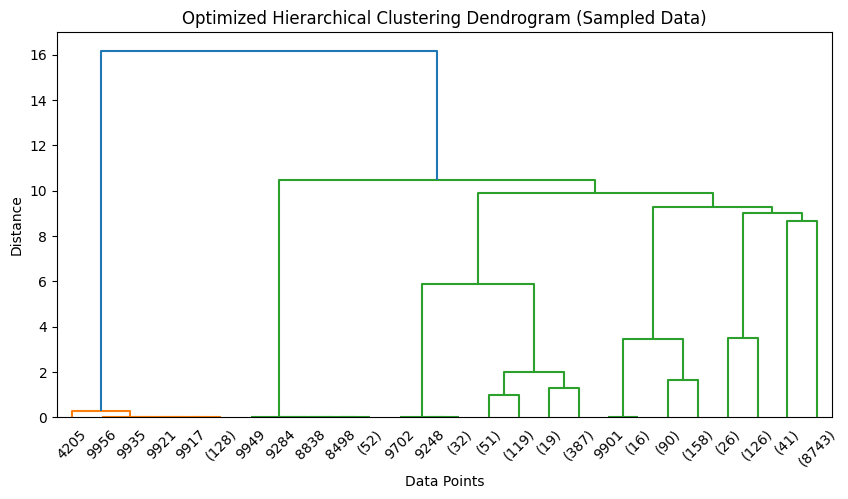

In [ ]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.utils import resample
from sklearn.decomposition import TruncatedSVD

### ✅ Step 1: Reduce Dataset for Hierarchical Clustering ###
sample_size = min(10000, len(email_data))  # Take up to 2000 samples
email_sample = email_data.sample(sample_size, random_state=42)

# Recompute TF-IDF for Sample
X_tfidf_sample = vectorizer.fit_transform(email_sample["Cleaned_Subject"].astype(str))

### ✅ Step 2: Use Truncated SVD for Dimensionality Reduction ###
svd = TruncatedSVD(n_components=50, random_state=42)  # Reduce to 50 features
X_svd = svd.fit_transform(X_tfidf_sample)

### ✅ Step 3: Hierarchical Clustering (Ward’s Method) ###
linkage_matrix = linkage(X_svd, method="ward")

# Plot Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Optimized Hierarchical Clustering Dendrogram (Sampled Data)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

num_clusters = 9

#Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage="ward")
email_sample["Hierarchical_Cluster"] = agg_clustering.fit_predict(X_svd)

#Display Cluster Counts
print("\nCluster Distribution:\n", email_sample["Hierarchical_Cluster"].value_counts())


Cluster Distribution:
 Hierarchical_Cluster
0    8540
1     610
4     265
3     169
2     152
8     133
5      56
6      41
7      34
Name: count, dtype: int64



Cluster Comparison with Hybrid Priority:
 Hierarchical_Cluster       0      1      2      3      4     5     6     7  \
Hybrid_Priority                                                              
High                   267.0   18.0    1.0    5.0    9.0   NaN   NaN   NaN   
Low                      NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   
Medium                8273.0  592.0  151.0  164.0  256.0  56.0  41.0  34.0   

Hierarchical_Cluster      8  
Hybrid_Priority              
High                    NaN  
Low                   133.0  
Medium                  NaN  


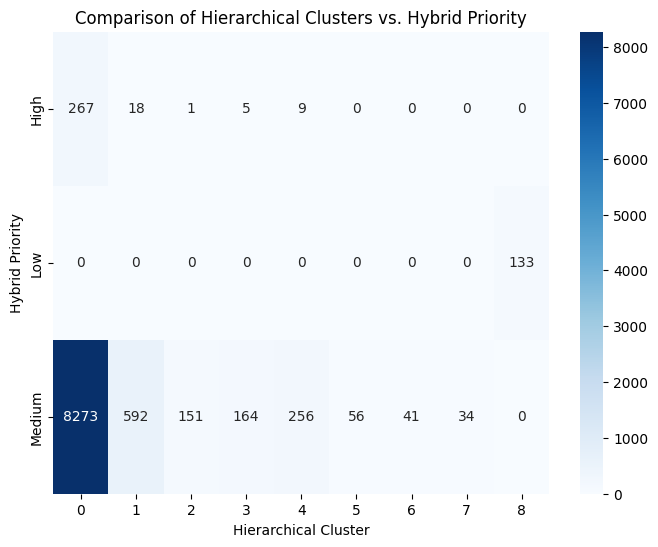

In [ ]:
#Compare Hierarchical Clustering with Hybrid Priority
cluster_comparison = email_sample.groupby(["Hybrid_Priority", "Hierarchical_Cluster"]).size().unstack()
print("\nCluster Comparison with Hybrid Priority:\n", cluster_comparison)

#Convert NaN to 0 for heatmap visualization
cluster_comparison = cluster_comparison.fillna(0)

#Visualize Comparison (Fixed)
plt.figure(figsize=(8,6))
sns.heatmap(cluster_comparison, annot=True, cmap="Blues", fmt=".0f")  # Use ".0f" for whole numbers
plt.title("Comparison of Hierarchical Clusters vs. Hybrid Priority")
plt.xlabel("Hierarchical Cluster")
plt.ylabel("Hybrid Priority")
plt.show()

#DBSCAN Test - 10,000 Sample Dataset - No clear separation

In [ ]:
import pandas as pd
from google.colab import files

# Load your email dataset (if not already loaded)
# email_data = pd.read_csv('/path/to/your/email_data.csv')  # Uncomment if loading from file

if len(email_data) >= 10000:
    email_subset = email_data.sample(n=10000, random_state=42)  # Randomly select 10,000 rows
else:
    email_subset = email_data

csv_filename = "/content/email_subset.csv"
email_subset.to_csv(csv_filename, index=False)

files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


DBSCAN Cluster Distribution:
 DBSCAN_Cluster
0    10000
Name: count, dtype: int64


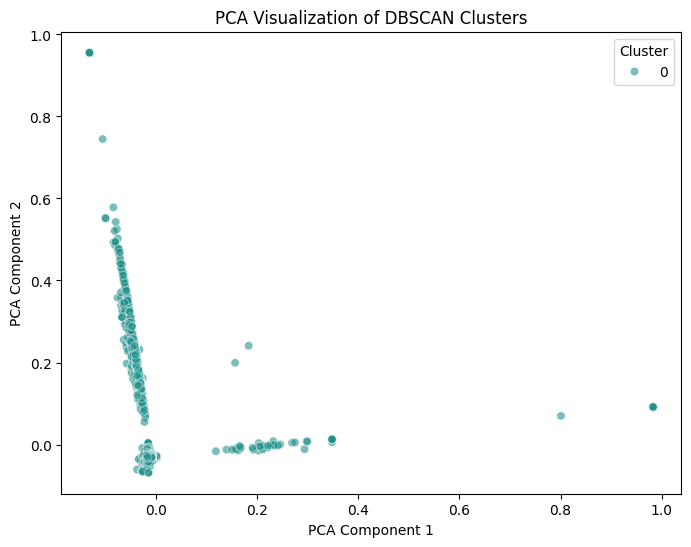

In [ ]:
from sklearn.utils import resample

#Apply DBSCAN on the sampled data
dbscan = DBSCAN(eps=1.00, min_samples=150, metric="cosine", n_jobs=-1)  # Reduce eps for finer clustering
email_sample["DBSCAN_Cluster"] = dbscan.fit_predict(X_tfidf_sample)

#Count DBSCAN clusters
dbscan_cluster_counts = email_sample["DBSCAN_Cluster"].value_counts()
print("\nDBSCAN Cluster Distribution:\n", dbscan_cluster_counts)

#Perform PCA for visualization (reduce TF-IDF to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf_sample.toarray())

#Add PCA components to DataFrame
email_sample["PCA1"] = X_pca[:, 0]
email_sample["PCA2"] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=email_sample["PCA1"], y=email_sample["PCA2"], hue=email_sample["DBSCAN_Cluster"], palette="viridis", alpha=0.6)
plt.title("PCA Visualization of DBSCAN Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


DBSCAN Cluster Comparison with Hybrid Priority:
 DBSCAN_Cluster      0
Hybrid_Priority      
High              300
Low               133
Medium           9567


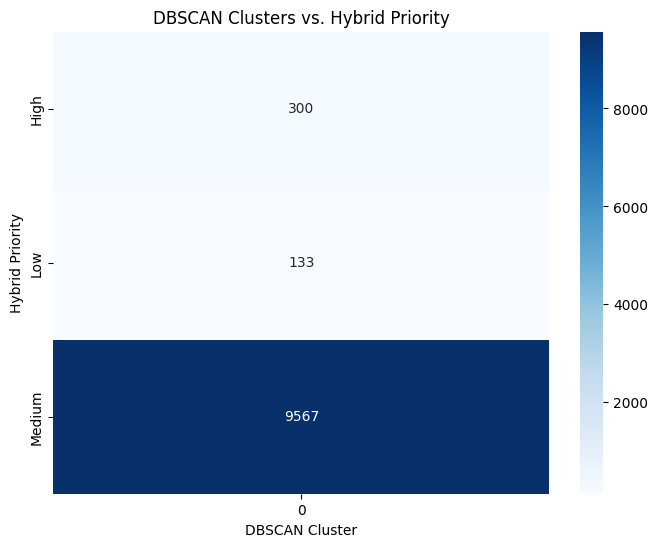

In [ ]:
cluster_comparison = email_sample.groupby(["Hybrid_Priority", "DBSCAN_Cluster"]).size().unstack()
print("\nDBSCAN Cluster Comparison with Hybrid Priority:\n", cluster_comparison)

plt.figure(figsize=(8,6))
sns.heatmap(cluster_comparison, annot=True, cmap="Blues", fmt=".0f")
plt.title("DBSCAN Clusters vs. Hybrid Priority")
plt.xlabel("DBSCAN Cluster")
plt.ylabel("Hybrid Priority")
plt.show()

#Hybrid Approach - DBSCAN and K-Mean - Subject

In [ ]:
# Run DBSCAN to detect outliers
from sklearn.cluster import DBSCAN

# Assuming the features (like TF-IDF matrix or cleaned data) are ready
dbscan = DBSCAN(eps=0.90, min_samples=150, metric='cosine')
dbscan_labels = dbscan.fit_predict(X_tfidf)  # X_tfidf is the feature matrix

# Create a new column to store the DBSCAN cluster labels
email_data['DBSCAN_Cluster'] = dbscan_labels

# Extract outlier data points (DBSCAN assigns '-1' to outliers)
outliers = email_data[email_data['DBSCAN_Cluster'] == -1]

In [ ]:
from sklearn.cluster import KMeans

# Perform K-Means clustering (set 3 clusters for High, Medium, and Low priority)
kmeans = KMeans(n_clusters=3, random_state=42)
email_data['KMeans_Cluster'] = kmeans.fit_predict(X_tfidf)

# Assigning labels to each cluster based on analysis of the cluster centroids
cluster_labels = {0: 'High', 1: 'Medium', 2: 'Low'}  # You can adjust based on your analysis
email_data['Predicted_Priority'] = email_data['KMeans_Cluster'].map(cluster_labels)

In [ ]:
email_data

In [ ]:
print("Outliers detected by DBSCAN:")
print(outliers)

In [ ]:
# View the classified results
print("K-Means Cluster Assignment:")
print(email_data[['Cleaned_Subject', 'Predicted_Priority']].head())

K-Means Cluster Assignment:
                 Cleaned_Subject Predicted_Priority
0  oati etag minimum requirement               High
1  oati etag minimum requirement               High
2  oati etag minimum requirement               High
3  oati etag minimum requirement               High
4          gonescr virus warning               High


In [ ]:
email_data["Predicted_Priority"].value_counts()

,count
Predicted_Priority,
High,223281
Medium,7933
Low,3712


In [ ]:
email_data

inaccurate

In [ ]:
from google.colab import files

email_data.to_csv('/content/email_data_priority_label_validation.csv', index=False)
files.download("email_data_priority_label_validation.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Modeling Building - Subject

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

email_data = pd.read_csv('/content/drive/MyDrive/FYPDataset/email_data_with_priority_label.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
email_data["Cleaned_Subject"] = email_data["Cleaned_Subject"].replace({
    "gonescr": "gone scr",
    "surveyinformation": "survey information"
})

email_data = email_data[email_data["Cleaned_Subject"] != "subject"]

#Drop Rows with NaN Values
email_data = email_data.dropna(subset=['Cleaned_Subject'])

In [ ]:
email_data.columns

Index(['Cleaned_Subject', 'Hybrid_Priority'], dtype='object')

In [ ]:
email_data = email_data.drop(columns=["From"])
email_data = email_data.drop(columns=["To"])
email_data = email_data.drop(columns=["Subject"])
email_data = email_data.drop(columns=["Message"])
email_data = email_data.drop(columns=["Day"])
email_data = email_data.drop(columns=["Date & Time"])
email_data = email_data.drop(columns=["Response Time"])
email_data = email_data.drop(columns=["Extracted Metadata"])
email_data = email_data.drop(columns=["Cleaned_Message"])
email_data = email_data.drop(columns=["Combined_Text"])
email_data = email_data.drop(columns=["Summarized_Text"])
email_data = email_data.drop(columns=["Topic"])
#email_data = email_data.drop(columns=["Word_Count"])
#email_data = email_data.drop(columns=["Is_Forwarded"])
#Another Label Test
email_data = email_data.drop(columns=["Priority_Level"])

In [ ]:
email_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235405 entries, 0 to 235721
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Cleaned_Subject  235405 non-null  object
 1   Hybrid_Priority  235405 non-null  object
dtypes: object(2)
memory usage: 5.4+ MB


In [ ]:
email_data["Hybrid_Priority"].value_counts()

,count
Hybrid_Priority,
Low,193836
Medium,30918
High,10651


#Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X = vectorizer.fit_transform(email_data["Cleaned_Subject"])

le = LabelEncoder()
y = le.fit_transform(email_data["Hybrid_Priority"])

X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
print(X_tfidf_df.head())

    aa  aaa   ab  abb  abcnewscom  ability  abn  abstract  abuse  abx  ...  \
0  0.0  0.0  0.0  0.0         0.0      0.0  0.0       0.0    0.0  0.0  ...   
1  0.0  0.0  0.0  0.0         0.0      0.0  0.0       0.0    0.0  0.0  ...   
2  0.0  0.0  0.0  0.0         0.0      0.0  0.0       0.0    0.0  0.0  ...   
3  0.0  0.0  0.0  0.0         0.0      0.0  0.0       0.0    0.0  0.0  ...   
4  0.0  0.0  0.0  0.0         0.0      0.0  0.0       0.0    0.0  0.0  ...   

   youre  youve  ypo   yr  ytd  zero  ziff  zipper  zone  zufferli  
0    0.0    0.0  0.0  0.0  0.0   0.0   0.0     0.0   0.0       0.0  
1    0.0    0.0  0.0  0.0  0.0   0.0   0.0     0.0   0.0       0.0  
2    0.0    0.0  0.0  0.0  0.0   0.0   0.0     0.0   0.0       0.0  
3    0.0    0.0  0.0  0.0  0.0   0.0   0.0     0.0   0.0       0.0  
4    0.0    0.0  0.0  0.0  0.0   0.0   0.0     0.0   0.0       0.0  

[5 rows x 5000 columns]


In [ ]:
#Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Using Class Weight

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Convert to numpy array (even if it's already numbers)
classes = np.array([0, 1, 2])

# Now compute class weights (assuming y_train is still numeric: 0 = High, 1 = Low, 2 = Medium)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)

# Create dictionary (this is what most models expect)
class_weight_dict = {cls: weight for cls, weight in zip(classes, class_weights)}

print(class_weight_dict)

{0: 7.367053945155107, 1: 0.4048176403192557, 2: 2.5379908897334302}


#Logistic Regression - Class Weight

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight="balanced", max_iter=500, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)

Classification Report:
              precision    recall  f1-score   support

        High       0.92      0.92      0.92      2130
         Low       0.99      0.99      0.99     38767
      Medium       0.93      0.94      0.94      6184

    accuracy                           0.98     47081
   macro avg       0.95      0.95      0.95     47081
weighted avg       0.98      0.98      0.98     47081



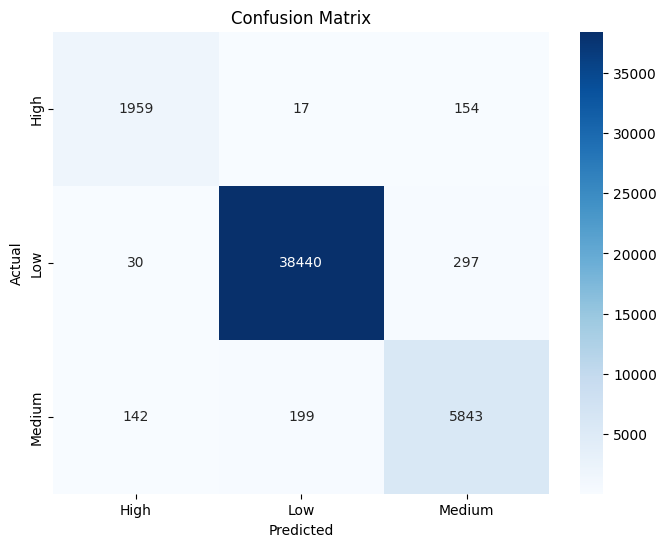

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Oversampling for High and Medium

In [ ]:
#Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE
#Oversampling with SMOTE (Balancing High, Medium, Low)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Check class distribution after resampling (optional sanity check)
print("After SMOTE Resampling:")
print(pd.Series(y_train_resampled).value_counts())

After SMOTE Resampling:
1    155069
0    155069
2    155069
Name: count, dtype: int64


In [ ]:
classes = np.unique(y_train_resampled)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train_resampled)
class_weight_dict = {cls: weight for cls, weight in zip(classes, class_weights)}
print(f"Computed Class Weights: {class_weight_dict}")

Computed Class Weights: {0: 1.0, 1: 1.0, 2: 1.0}


Random Forest with SMOTE


Classification Report:
              precision    recall  f1-score   support

        High       0.99      0.94      0.97      2130
         Low       1.00      1.00      1.00     38767
      Medium       0.96      0.97      0.97      6184

    accuracy                           0.99     47081
   macro avg       0.98      0.97      0.98     47081
weighted avg       0.99      0.99      0.99     47081



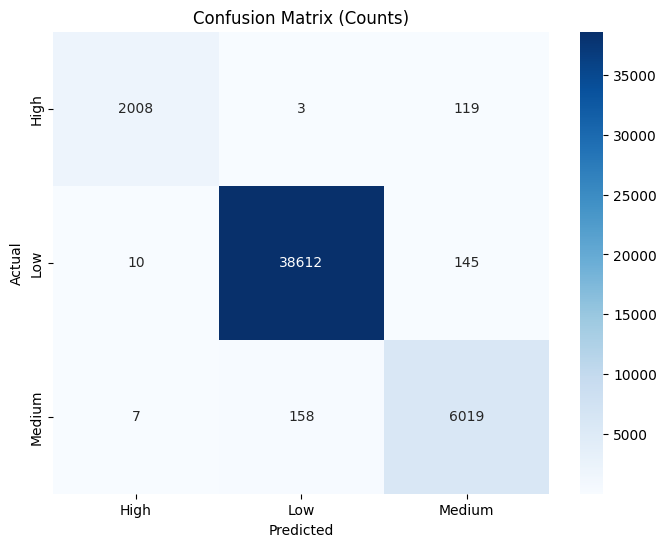

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

model = RandomForestClassifier(
    class_weight=class_weight_dict,
    n_estimators=100,
    random_state=42
)

model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['High', 'Low', 'Medium']))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['High', 'Low', 'Medium'], yticklabels=['High', 'Low', 'Medium'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Counts)')
plt.show()

Logistic Regression with SMOTE

Classification Report:
              precision    recall  f1-score   support

        High       0.82      0.88      0.85      2130
         Low       0.99      0.99      0.99     38767
      Medium       0.91      0.91      0.91      6184

    accuracy                           0.98     47081
   macro avg       0.91      0.93      0.92     47081
weighted avg       0.98      0.98      0.98     47081



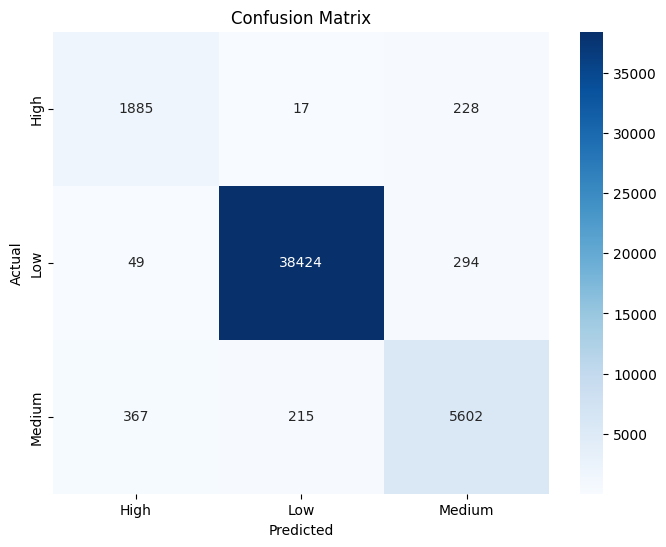

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight="balanced", max_iter=500, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


🔎 Results for: RandomForest - No SMOTE
              precision    recall  f1-score   support

        High       0.99      0.97      0.98      2130
         Low       1.00      1.00      1.00     38767
      Medium       0.97      0.97      0.97      6184

    accuracy                           0.99     47081
   macro avg       0.99      0.98      0.98     47081
weighted avg       0.99      0.99      0.99     47081



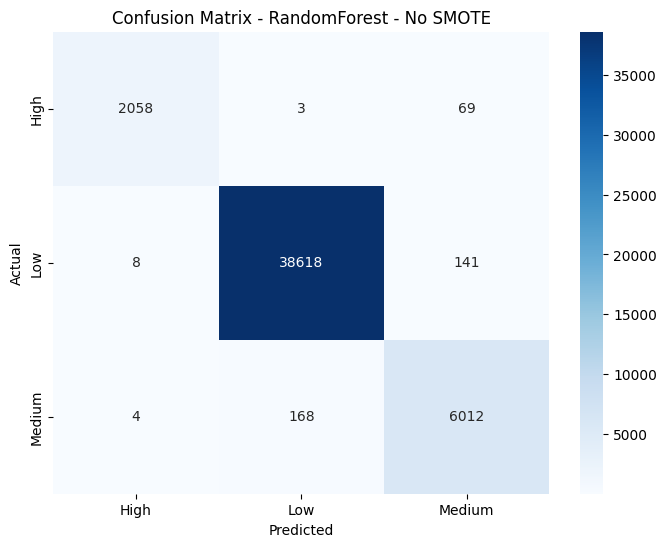


🔎 Results for: RandomForest - With SMOTE
              precision    recall  f1-score   support

        High       0.99      0.94      0.97      2130
         Low       1.00      0.99      0.99     38767
      Medium       0.94      0.97      0.96      6184

    accuracy                           0.99     47081
   macro avg       0.98      0.97      0.97     47081
weighted avg       0.99      0.99      0.99     47081



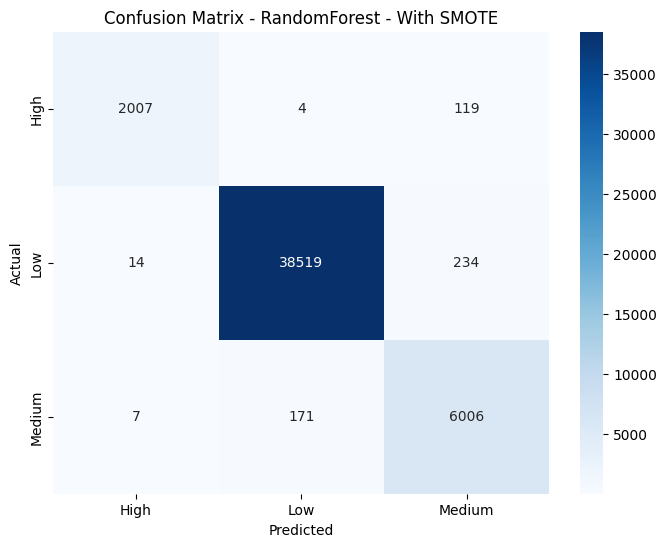


🔎 Results for: Logistic Regression - No SMOTE
              precision    recall  f1-score   support

        High       0.94      0.72      0.82      2130
         Low       0.99      1.00      0.99     38767
      Medium       0.89      0.94      0.91      6184

    accuracy                           0.98     47081
   macro avg       0.94      0.88      0.91     47081
weighted avg       0.98      0.98      0.97     47081



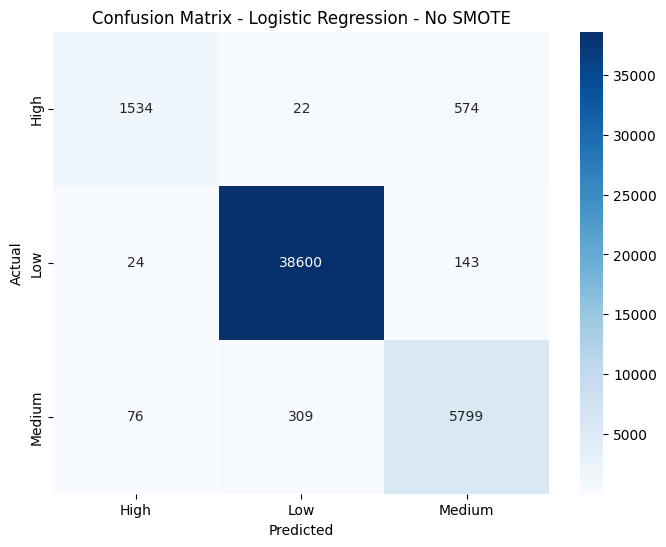


📊 Cross-Val Macro F1 Scores: [0.98116847 0.9798218  0.98166193 0.98316964 0.98206717]
Mean Macro F1: 0.9816


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = {cls: weight for cls, weight in zip(classes, class_weights)}

def train_and_evaluate(model, X_train, y_train, X_test, y_test, title='Model'):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n🔎 Results for: {title}")
    print(classification_report(y_test, y_pred, target_names=['High', 'Low', 'Medium']))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['High', 'Low', 'Medium'], yticklabels=['High', 'Low', 'Medium'])
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#1 Baseline: RandomForest with Class Weights (No SMOTE)
baseline_model = RandomForestClassifier(
    class_weight=class_weight_dict,
    n_estimators=100,
    random_state=42
)
train_and_evaluate(baseline_model, X_train, y_train, X_test, y_test, title="RandomForest - No SMOTE")

#2 SMOTE + Class Weights
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

smote_model = RandomForestClassifier(
    class_weight=class_weight_dict,
    n_estimators=100,
    random_state=42
)
train_and_evaluate(smote_model, X_train_resampled, y_train_resampled, X_test, y_test, title="RandomForest - With SMOTE")

#3 Logistic Regression (Simple Model - Class Weights Only)
logreg_model = LogisticRegression(
    class_weight=class_weight_dict,
    max_iter=500,
    solver='liblinear'
)
train_and_evaluate(logreg_model, X_train, y_train, X_test, y_test, title="Logistic Regression - No SMOTE")

#4 Cross-Validation Check (Original Data + Class Weights Only)
def cross_val_score_report(model, X, y):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, scoring='f1_macro', cv=skf)
    print(f"\n📊 Cross-Val Macro F1 Scores: {scores}")
    print(f"Mean Macro F1: {scores.mean():.4f}")

cv_model = RandomForestClassifier(
    class_weight=class_weight_dict,
    n_estimators=100,
    random_state=42
)
cross_val_score_report(cv_model, X, y)

#BERT MODEL - Failed to Run

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

email_data = pd.read_csv('/content/drive/MyDrive/FYPDataset/email_data_with_priority_label.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
email_data["Combined_Text"] = email_data["Combined_Text"].astype(str).fillna("")

In [ ]:
email_data.shape

(235722, 15)

In [ ]:
email_data.columns

Index(['From', 'To', 'Subject', 'Message', 'Day', 'Date & Time',
       'Response Time', 'Extracted Metadata', 'Cleaned_Message',
       'Cleaned_Subject', 'Combined_Text', 'Summarized_Text', 'Topic',
       'Priority_Level', 'Hybrid_Priority'],
      dtype='object')

In [ ]:
#CRASH
from transformers import pipeline

# Safety check: Ensure column exists
if 'Combined_Text' not in email_data.columns:
    raise ValueError("Column 'Combined_Text' not found in email_data")

# Initialize Zero-shot Classification Pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define Priority Labels
candidate_labels = ["High", "Medium", "Low"]

# Classification Function
def predict_priority(text):
    result = classifier(text, candidate_labels)
    return result['labels'][0]  # Highest scoring label (Top Priority)

email_data['Bert_Priority'] = email_data['Combined_Text'].apply(predict_priority)

#BART-large MNLI - Combined Text

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

email_data = pd.read_csv('/content/drive/MyDrive/FYPDataset/email_data_bart_priority_checkpoint.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm
import time
from google.colab import drive

drive.mount('/content/drive')

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=0)

candidate_labels = ["High", "Medium", "Low"]

checkpoint_path = '/content/drive/MyDrive/FYPDataset/email_data_bart_priority_checkpoint.csv'

# This loads your progress so far
email_data = pd.read_csv(checkpoint_path)
print(f"✅ Resuming from existing checkpoint: {checkpoint_path}")

batch_size = 100

for start_idx in tqdm(range(0, len(email_data), batch_size)):
    end_idx = min(start_idx + batch_size, len(email_data))

    batch = email_data.iloc[start_idx:end_idx]
    batch_to_predict = batch[batch['BART_Priority'].isna()]

    if len(batch_to_predict) > 0:
        batch_texts = batch_to_predict['Combined_Text'].tolist()
        results = classifier(batch_texts, candidate_labels)
        predicted_priorities = [res['labels'][0] for res in results]
        email_data.loc[batch_to_predict.index, 'BART_Priority'] = predicted_priorities

    email_data.to_csv(checkpoint_path, index=False)

    time.sleep(1)

print(f"✅ Completed! All progress saved to: {checkpoint_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
<ipython-input-12-9958f07a0b9d>:16: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  email_data = pd.read_csv(checkpoint_path)


✅ Resuming from existing checkpoint: /content/drive/MyDrive/FYPDataset/email_data_bart_priority_checkpoint.csv


100%|██████████| 425/425 [2:10:30<00:00, 18.43s/it]

✅ Completed! All progress saved to: /content/drive/MyDrive/FYPDataset/email_data_bart_priority_checkpoint.csv


success

In [ ]:
email_data['Hybrid_Priority'].value_counts()

,count
Hybrid_Priority,
Low,34148
Medium,5990
High,2333


In [ ]:
email_data['BART_Priority'].value_counts()

,count
BART_Priority,
High,34001
Medium,4493
Low,3977


Hybrid_Priority using keywords and k-means with Subject

BART Priority using pre-trained model BART with Combined_Text

Hybrid_Priority still the most accurate so far***

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

#Comparison
original_labels = email_data["Hybrid_Priority"]
hybrid_labels = email_data["BART_Priority"]

report = classification_report(original_labels, hybrid_labels, zero_division=0, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()

conf_matrix = confusion_matrix(original_labels, hybrid_labels, labels=["Low", "Medium", "High"])
df_conf_matrix = pd.DataFrame(conf_matrix, index=["Low (Actual)", "Medium (Actual)", "High (Actual)"],
                              columns=["Low (Predicted)", "Medium (Predicted)", "High (Predicted)"])

print("Hybrid Model vs BART Model Classification Report:")
print(df_classification_report)

Hybrid Model vs BART Model Classification Report:
              precision    recall  f1-score      support
High           0.059381  0.865409  0.111136   2333.00000
Low            0.768418  0.089493  0.160315  34148.00000
Medium         0.136657  0.102504  0.117142   5990.00000
accuracy       0.133950  0.133950  0.133950      0.13395
macro avg      0.321485  0.352469  0.129531  42471.00000
weighted avg   0.640368  0.133950  0.151524  42471.00000


In [ ]:
import random

sample_emails = email_data.sample(n=10)

for index, row in sample_emails.iterrows():
    print(f"Subject: {row['Subject']}")
    print(f"Message: {row['Message']}")
    print(f"HYBRID Predicted Priority Level: {row['Hybrid_Priority']}")
    print(f"BART Predicted Priority Level: {row['BART_Priority']}")
    print("-"*20)